## Simulation of Hospital Management System with Imaginary Patients Dataset

<hr>

### First

**Generate imaginary dataset with specifiying the preferred arguments: average stay, number of patients, and the time interval**.

File usage:<br><br>
```$ python dataset_generate.py AVG_STAY NUM_PATIENTS START_MONTH END_MONTH
```

**AVG_STAY**: average days stayed at hospital per patients.<br>
**NUM_PATIENTS**: number of total patients in the dataset.<br>
**START_MONTH**: start month (of the year) of the dataset time interval.<br>
**END_MONTH**: end month (of the year) of the dataset time interval.<br>

##### Run the file to generate the dataset

In [1]:
%run src/dataset_generate.py 2 2000 1 4

generated patients dataset and wrote output into: 
	per-patient-data.csv


##### Verify consistency of the generated dataset

In [2]:
%run src/dataset_verify.py

2000 patients were admitted.
9.45% admitted into IC Rooms (total 189)
1.98 day(s) is the average stay of a patient.


<hr>

# Second
process per-patient dataset to generate (aggregate) per-day dataset (information per daily ticks).

##### run the file to process the per-patient dataset

In [3]:
%run src/process_data.py

processed the per-patient dataset:
	per-patient-data.csv
and generated the aggregated new dataset into:
	per-day-data.csv


### Description of the per-day dataset columns

`InPatients`: Number of patients admitted to hospital in a given day.<br>
`OutPatients`: Number of patients leaving hosptial after receiving treatement in a given day.<br>
`InICU`: Number of patients admitted into Intensive Care Unit in a given day.<br>
`OutICU`: Number of patients leaving the Intensive Care Unit in a given day.<br>
`ICUroomTotal`: Total (accumulative) Number of patients in ICU rooms.<br>
`OverallTotal`: Total (accumulative) Number of patients in the hospital (including the ICUroomTotal).


<hr>

##### Now, we have two kinds of datasets:

- per-patient

- per-day

In [4]:
per_patient = pd.read_csv('per-patient-data.csv')
per_day = pd.read_csv('per-day-data.csv', parse_dates=True)

### Raw (simulated) data "sample"

In [5]:
per_patient[:4]

,PatientID,AdmitDay,DaysStay,LeaveDay,ICRoom
0,NYC1000,2015-02-22,0,2015-02-22,no
1,NYC1001,2015-03-21,3,2015-03-24,no
2,NYC1002,2015-02-02,3,2015-02-05,no
3,NYC1003,2015-03-28,1,2015-03-29,no


### Final processed (generated) dataset "sample"

In [6]:
per_day[:4]

,Date,InPatients,OutPatients,InICU,OutICU,ICUroomTotal,OverallTotal
0,2015-01-01,22,1,4,0,4,21
1,2015-01-02,22,8,3,1,6,35
2,2015-01-03,16,11,3,0,9,40
3,2015-01-04,17,23,3,5,7,34


columns operations

see:
> http://stackoverflow.com/questions/30266879/i-want-to-get-the-relative-index-of-a-column-in-a-pandas-dataframe

In [177]:
# print daily['InPatients'][:10]
# print daily.OverallTotal[:10]
# print daily['InPatients'][:10] + daily['InPatients'][:10].shift(1)

# Third
Visualizing and exploring the datasets

In [7]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np

see [pandas cookbook sample](http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%206%20-%20String%20Operations-%20Which%20month%20was%20the%20snowiest.ipynb)

## 1) per-patient data

In [31]:
pdata = pd.read_csv('per-patient-data.csv')

##### Total number of patients $y$ that stay $x$ days

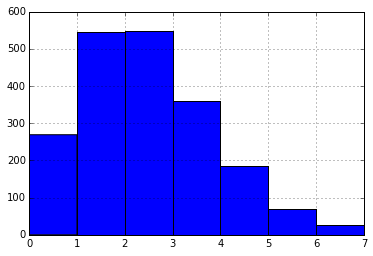

In [46]:
pdata.DaysStay.hist(bins=max(pdata.DaysStay))

##### The probability density $y$ that a patient stays $x$ days

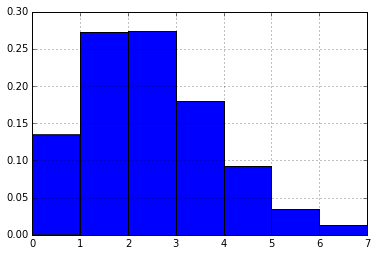

In [48]:
pdata.DaysStay.hist(bins=max(pdata.DaysStay), normed=True)

## 2) per-day data

In [12]:
daydata = pd.DataFrame.from_csv('per-day-data.csv', parse_dates=True, index_col='Date')

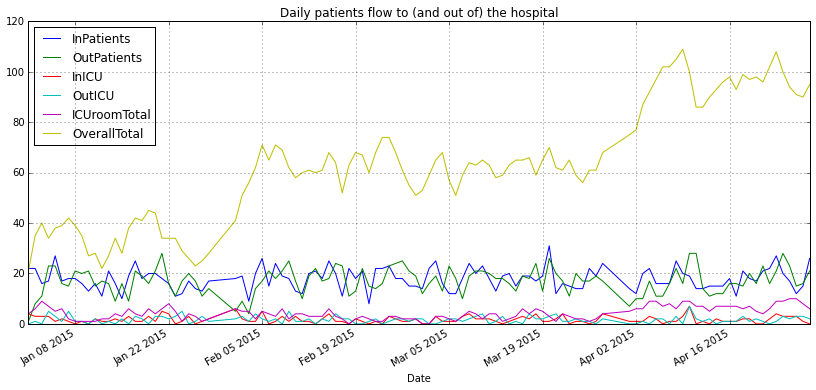

In [51]:
daydata.plot(title="Daily patients flow to (and out of) the hospital", figsize=(14,6))

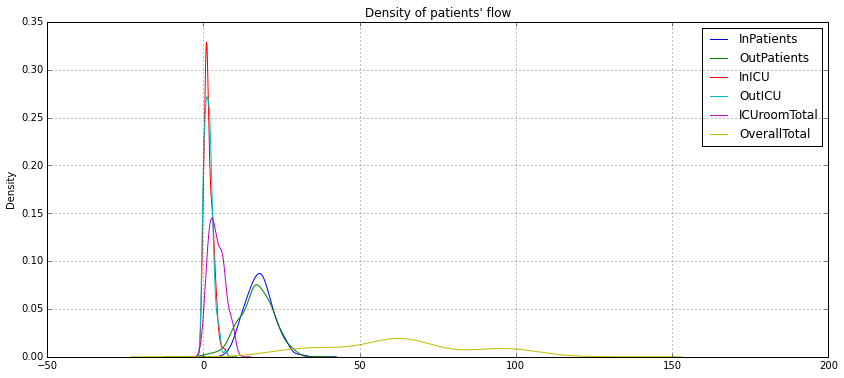

In [53]:
daydata.plot(title='Density of patients\' flow', kind='kde', figsize=(14,6))

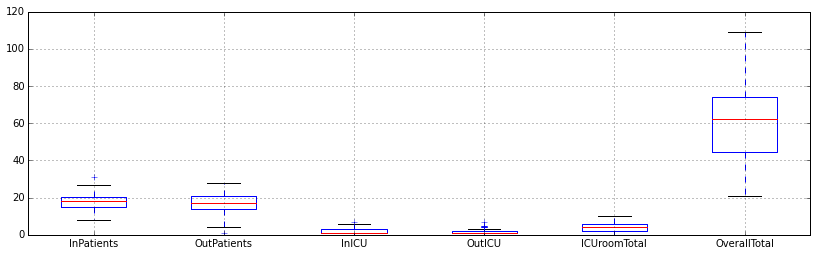

In [20]:
daydata.plot(kind='box', figsize=(14,4))

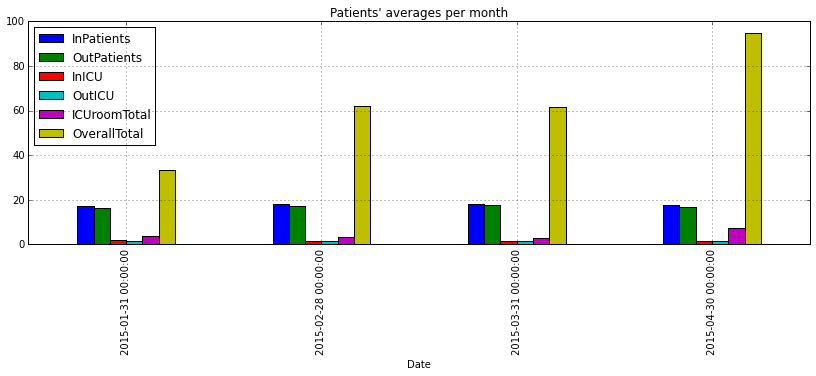

In [54]:
daydata.resample('M').plot(kind='bar', figsize=(14,4), title="Patients\' averages per month")

### Use resampling to find the most active month

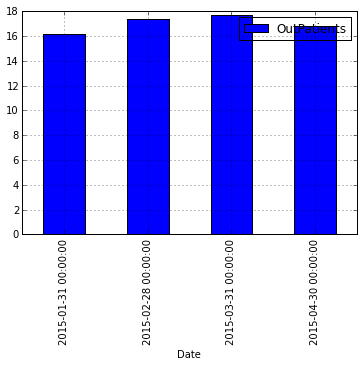

In [24]:
daydata.OutPatients.resample('M').plot(kind='bar', legend=True)
# daily.OutPatients.resample('M').plot() ==> won't work
# dailydata.InPatients.resample('M').plot(kind='line', legend=True, label='Incoming', title=title)

<hr>

http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/master/cookbook/Chapter%204%20-%20Find%20out%20on%20which%20weekday%20people%20bike%20the%20most%20with%20groupby%20and%20aggregate.ipynb

<hr>

In [37]:
# box info
c = 'OverallTotal'
print dailies[c].max()
print dailies[c].median()
print dailies[c].min()

163
142.0
36


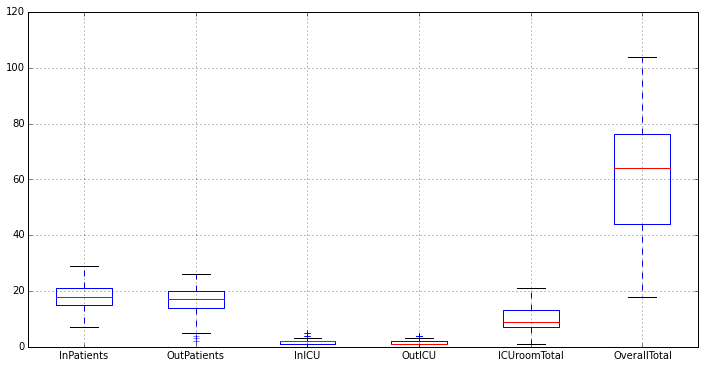

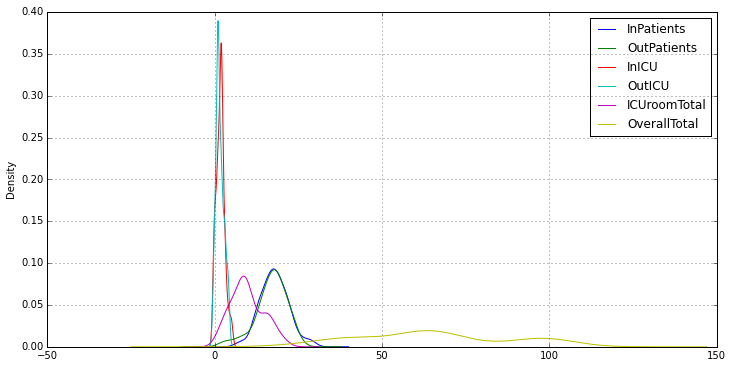

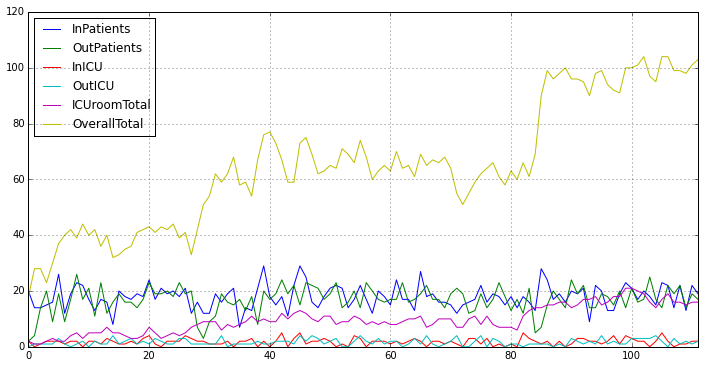

In [20]:
daily.plot(kind='box', figsize=(12,6))
daily.plot(kind='kde', figsize=(12,6))
daily.plot(kind='line', figsize=(12,6), grid=True)

In [133]:
daily.plot?

# Dataset

health datasets from NYC open data:
https://nycopendata.socrata.com/data?browseSearch=&scope=&agency=&cat=health&type=datasets


large health datasets http://www.ehdp.com/vitalnet/datasets.htm

HealthData.gov http://hub.healthdata.gov/dataset

health http://hcupnet.ahrq.gov

health care databases:
http://www.hcup-us.ahrq.gov

len of stay http://www.hcup-us.ahrq.gov/sidoverview.jsp#data